In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set()

In [3]:
vin = pd.read_csv('winequality-white.csv', sep=';')

In [4]:
vin.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
vin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
TASTE = []
for i in vin['quality']:
    if i >= 7:
        i=1
        TASTE.append(i)
    else:
        i=0
        TASTE.append(i)
vin['TASTE'] = TASTE

In [7]:
vin.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,TASTE
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [8]:
vin.drop('quality', axis=1, inplace=True)

In [9]:
vin.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,TASTE
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,0


In [10]:
vin.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,TASTE
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.216415
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.411842
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,0.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [11]:
vin.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,TASTE
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.080748
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.067225
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.035330
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.117085
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.183118
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,-0.023413
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.162202
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.283871
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.093510
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.047410


In [13]:
corr_m = vin.corr()
print(corr_m)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
TASTE                     -0.080748         -0.067225    -0.035330   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

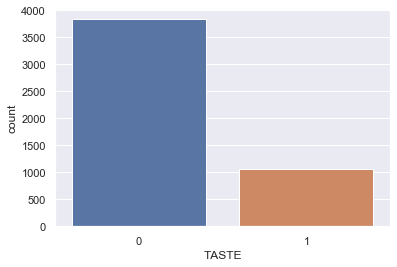

In [12]:
sns.countplot(x=vin['TASTE'])

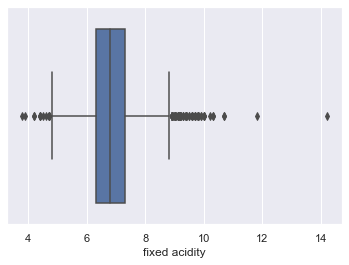

In [13]:
sns.boxplot(x=vin['fixed acidity'])

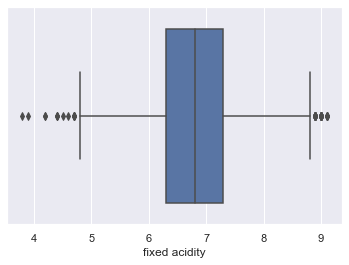

In [14]:
q = vin['fixed acidity'].quantile(0.99)
vin = vin[vin['fixed acidity'] < q]

sns.boxplot(x=vin['fixed acidity'])

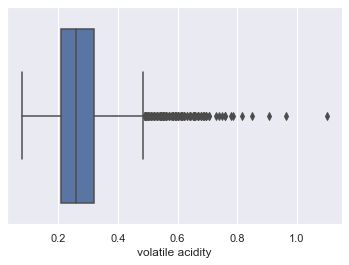

In [15]:
sns.boxplot(x=vin['volatile acidity'])

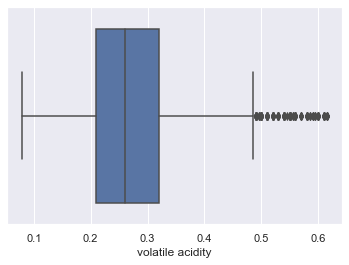

In [16]:
q = vin['volatile acidity'].quantile(0.99)
vin = vin[vin['volatile acidity'] < q]

sns.boxplot(x=vin['volatile acidity'])

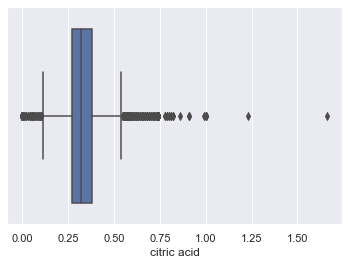

In [17]:
sns.boxplot(x=vin['citric acid'])

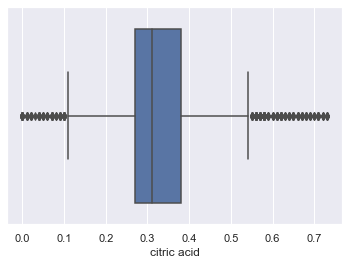

In [18]:
q = vin['citric acid'].quantile(0.99)
vin = vin[vin['citric acid'] < q]

sns.boxplot(x=vin['citric acid'])

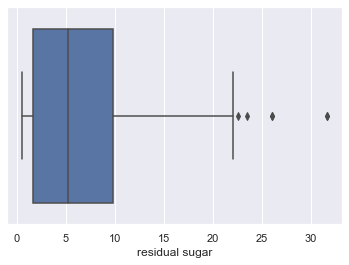

In [19]:
sns.boxplot(x=vin['residual sugar'])

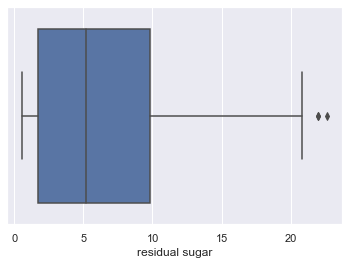

In [20]:
q = vin['residual sugar'].quantile(0.999)
vin = vin[vin['residual sugar'] < q]

sns.boxplot(x=vin['residual sugar'])

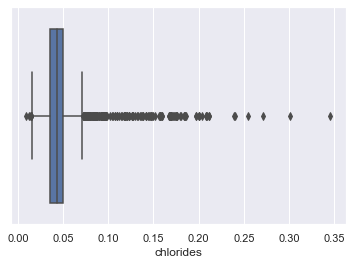

In [21]:
sns.boxplot(x=vin['chlorides'])

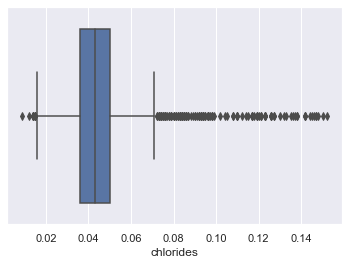

In [22]:
q = vin['chlorides'].quantile(0.99)
vin = vin[vin['chlorides'] < q]

sns.boxplot(x=vin['chlorides'])

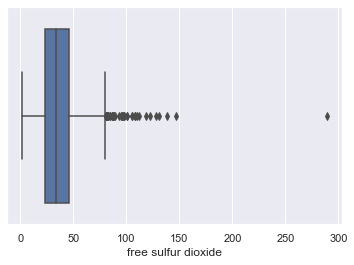

In [23]:
sns.boxplot(x=vin['free sulfur dioxide'])

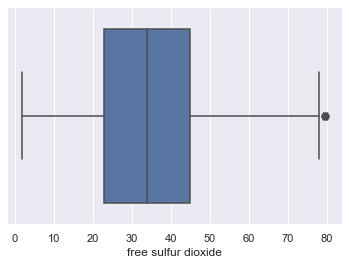

In [24]:
q = vin['free sulfur dioxide'].quantile(0.99)
vin = vin[vin['free sulfur dioxide'] < q]

sns.boxplot(x=vin['free sulfur dioxide'])

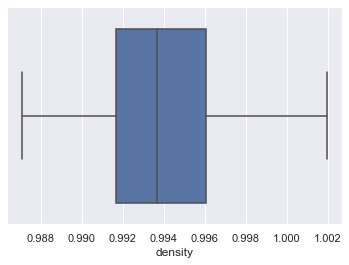

In [25]:
sns.boxplot(x=vin['density'])
# density has no outliers

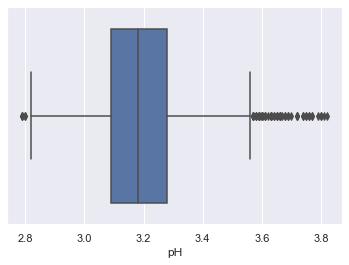

In [26]:
sns.boxplot(x=vin['pH'])
#the outliers are not too far away

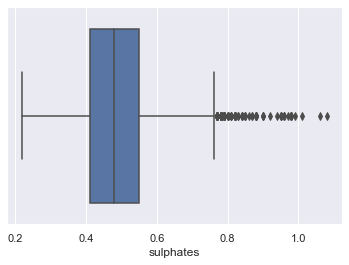

In [29]:
sns.boxplot(x=vin['sulphates'])

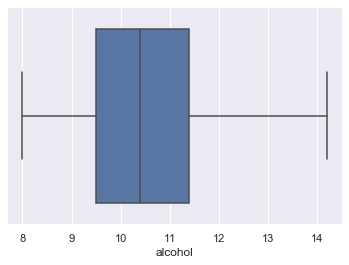

In [30]:
sns.boxplot(x=vin['alcohol'])

In [31]:
x = vin.drop('TASTE', axis=1)
y = vin['TASTE']

In [32]:
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=365)

In [34]:
# Logistic Regression
lg = LogisticRegression()
lg = lg.fit(x_train,y_train)
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)
print("Accuracy for Logistic Regression : Training data",metrics.accuracy_score(y_train, y_train_pred)*100)
print("Accuracy for Logistic Regression: Test Data",metrics.accuracy_score(y_test, y_test_pred)*100)

Accuracy for Logistic Regression : Training data 79.76190476190477
Accuracy for Logistic Regression: Test Data 79.004329004329


/Users/sarojakondamudi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
# for trainining data before grid search
lg_cm = confusion_matrix(y_train_pred , y_train)
tp_lg ,fp_lg , fn_lg , tn_lg = lg_cm.ravel()
tpr_train = (tp_lg)/(tp_lg + fn_lg)
print("in‐sample percent survivors correctly predicted (on training set) LG: " , tpr_train * 100)
tnr_train = tn_lg / (tn_lg+ fp_lg)
print("in-sample percent fatalities correctly predicted (on training set) LG: " , tnr_train * 100)
precision_lg = (tp_lg)/(tp_lg+fp_lg)
print("Precision for train data is: " , precision_lg * 100)

in‐sample percent survivors correctly predicted (on training set) LG:  94.53207150368034
in-sample percent fatalities correctly predicted (on training set) LG:  29.774614472123368
Precision for train data is:  82.00060808756461


In [37]:
# for testing data before grid search
lg_cm = confusion_matrix(y_test_pred , y_test)
tp_lg ,fp_lg , fn_lg , tn_lg = lg_cm.ravel()
tpr_test = (tp_lg)/(tp_lg + fn_lg)
print("out‐sample percent survivors correctly predicted (on test set) LG: " , tpr_test * 100)
tnr_test = tn_lg / (tn_lg+ fp_lg)
print("out-sample percent fatalities correctly predicted (on test set) LG: " , tnr_test * 100)
precision_lg = (tp_lg)/(tp_lg+fp_lg)
print("Precision for test data is: " , precision_lg * 100)

out‐sample percent survivors correctly predicted (on test set) LG:  93.37931034482759
out-sample percent fatalities correctly predicted (on test set) LG:  26.633165829145728
Precision for test data is:  82.26002430133657


In [39]:
from sklearn.model_selection import GridSearchCV
#build the parameter grid
lg = LogisticRegression()
lg_grid = [{'C':[1,2,3,4,5,6,7,8,9],'solver':['newton-cg','lbfgs','sag','saga'],
           'multi_class':['auto','ovr']}]

#build a grid search to find the best parameters
gridsearchDT  = GridSearchCV(lg, lg_grid)

#run the grid search
gridsearchDT.fit(x_train,y_train)

score = gridsearchDT.cv_results_
print(gridsearchDT.best_params_)
scores = gridsearchDT.cv_results_

/Users/sarojakondamudi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 8, 'multi_class': 'auto', 'solver': 'newton-cg'}


In [40]:
# using the above mentioned parameters to check if the accuracy has increased
# Logistic Regression
lg1 = LogisticRegression(C = 8, multi_class= 'auto', solver = 'newton-cg')
lg1 = lg1.fit(x_train,y_train)
y_train_pred1 = lg1.predict(x_train)
y_test_pred1 = lg1.predict(x_test)
print("Accuracy for Logistic Regression : Training data",metrics.accuracy_score(y_train, y_train_pred1)*100)
print("Accuracy for Logistic Regression: Test Data",metrics.accuracy_score(y_test, y_test_pred1)*100)

Accuracy for Logistic Regression : Training data 79.73484848484848
Accuracy for Logistic Regression: Test Data 79.43722943722943


In [41]:
# for trainining data before grid search
lg_cm1 = confusion_matrix(y_train_pred1 , y_train)
tp_lg ,fp_lg , fn_lg , tn_lg = lg_cm1.ravel()
tpr_train = (tp_lg)/(tp_lg + fn_lg)
print("in‐sample percent survivors correctly predicted (on test set) LG_grid: " , tpr_train * 100)
tnr_train = tn_lg / (tn_lg+ fp_lg)
print("in-sample percent fatalities correctly predicted (on test set) LG_grid: " , tnr_train * 100)
precision_lg = (tp_lg)/(tp_lg+fp_lg)
print("Precision for train data is: " , precision_lg * 100)

in‐sample percent survivors correctly predicted (on test set) LG_grid:  94.3918682089029
in-sample percent fatalities correctly predicted (on test set) LG_grid:  30.13048635824436
Precision for train data is:  82.05362583790372


In [42]:
# for testing data before grid search
lg_cm1 = confusion_matrix(y_test_pred1 , y_test)
tp_lg ,fp_lg , fn_lg , tn_lg = lg_cm1.ravel()
tpr_test = (tp_lg)/(tp_lg + fn_lg)
print("in‐sample percent survivors correctly predicted (on test set) LG_grid: " , tpr_test * 100)
tnr_test = tn_lg / (tn_lg+ fp_lg)
print("in-sample percent fatalities correctly predicted (on test set) LG_grid: " , tnr_test * 100)
precision_lg = (tp_lg)/(tp_lg+fp_lg)
print("Precision for test data is: " , precision_lg * 100)

in‐sample percent survivors correctly predicted (on test set) LG_grid:  93.51724137931035
in-sample percent fatalities correctly predicted (on test set) LG_grid:  28.14070351758794
Precision for test data is:  82.58221680876979


In [79]:
from sklearn.svm import SVC
svc_model = SVC(gamma = 'auto')
svc_model = svc_model.fit(x_train,y_train)
y_train_pred = svc_model.predict(x_train)
y_test_pred = svc_model.predict(x_test)
print("Accuracy: Training data",metrics.accuracy_score(y_train, y_train_pred)*100)
print("Accuracy: Test Data",metrics.accuracy_score(y_test, y_test_pred)*100)

Accuracy: Training data 83.2521645021645
Accuracy: Test Data 83.008658008658


In [80]:
# for trainining data
svm_cm = confusion_matrix(y_train_pred , y_train)
tp_svm ,fp_svm , fn_svm , tn_svm = svm_cm.ravel()
tpr_train = (tp_svm)/(tp_svm + fn_svm)
print("in‐sample percent survivors correctly predicted (on training set) : " , tpr_train * 100)
tnr_train = tn_svm / (tn_svm+ fp_svm)
print("in-sample percent fatalities correctly predicted (on training set) : " , tnr_train * 100)
precision_svm = (tp_svm)/(tp_svm+fp_svm)
print("Precision for train data is: " , precision_svm * 100)

in‐sample percent survivors correctly predicted (on training set) :  96.60007010164739
in-sample percent fatalities correctly predicted (on training set) :  38.07829181494662
Precision for train data is:  84.07565588773642


In [81]:
# for testing data
svm_cm = confusion_matrix(y_test_pred , y_test)
tp_svm ,fp_svm , fn_svm , tn_svm = svm_cm.ravel()
tpr_test = (tp_svm)/(tp_svm + fn_svm)
print("in‐sample percent survivors correctly predicted (on test set): " , tpr_test * 100)
tnr_test = tn_svm / (tn_svm+ fp_svm)
print("in-sample percent fatalities correctly predicted (on test set) : " , tnr_test * 100)
precision_svm = (tp_svm)/(tp_svm+fp_svm)
print("Precision for test data is: " , precision_svm)
recall_svm = (tp_svm) / (tp_svm+fn_svm)
print("Recall for test data is: " , recall_svm)
f1_score_svm = 2*(recall_svm*precision_svm)/(recall_svm+precision_svm)
print("F1_Score for test data is: " , f1_score_svm)

in‐sample percent survivors correctly predicted (on test set):  95.72413793103448
in-sample percent fatalities correctly predicted (on test set) :  36.68341708542713
Precision for test data is:  0.8463414634146341
Recall for test data is:  0.9572413793103448
F1_Score for test data is:  0.8983818770226537


In [46]:
#Trying to imporve the accuracy by finding the best parameters using grid search
#build the parameter grid
svm = SVC()
svm_grid = [{'decision_function_shape':['ovo','ovr'],'gamma':['auto'],
            'degree':[1,2,3,4,5],'C':[3,4,7,8,9]}]

#build a grid search to find the best parameters
gridsearchsvm  = GridSearchCV(svm, svm_grid)

#run the grid search
gridsearchsvm.fit(x_train,y_train)

score = gridsearchsvm.cv_results_
print(gridsearchsvm.best_params_)
scores = gridsearchsvm.cv_results_

/Users/sarojakondamudi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 7, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'auto'}


In [50]:
# applying the above results to imporve the accuracy
from sklearn.svm import SVC
svc_model1 = SVC(gamma = 'auto',decision_function_shape = 'ovo', C =7, degree=1)
svc_model1 = svc_model1.fit(x_train,y_train)
y_train_pred1 = svc_model1.predict(x_train)
y_test_pred1 = svc_model1.predict(x_test)
print("Accuracy: Training data after Grid Search",metrics.accuracy_score(y_train, y_train_pred)*100)
print("Accuracy: Test Data after Grid Search",metrics.accuracy_score(y_test, y_test_pred)*100)

Accuracy: Training data after Grid Search 83.2521645021645
Accuracy: Test Data after Grid Search 83.008658008658


In [51]:
# for trainining data
svm_cm1 = confusion_matrix(y_train_pred1 , y_train)
tp_svm ,fp_svm , fn_svm , tn_svm = svm_cm1.ravel()
tpr_train = (tp_svm)/(tp_svm + fn_svm)
print("in‐sample percent survivors correctly predicted (on training set) SVM_grid: " , tpr_train * 100)
tnr_train = tn_svm / (tn_svm+ fp_svm)
print("in-sample percent fatalities correctly predicted (on training set) SVM_grid: " , tnr_train * 100)
precision_svm = (tp_svm)/(tp_svm+fp_svm)
print("Precision for train data is: " , precision_svm * 100)

in‐sample percent survivors correctly predicted (on training set) SVM_grid:  96.60007010164739
in-sample percent fatalities correctly predicted (on training set) SVM_grid:  56.820877817319094
Precision for train data is:  88.33333333333333


In [52]:
# for testing data
svm_cm1 = confusion_matrix(y_test_pred1 , y_test)
tp_svm ,fp_svm , fn_svm , tn_svm = svm_cm1.ravel()
tpr_test = (tp_svm)/(tp_svm + fn_svm)
print("out‐sample percent survivors correctly predicted (on test set) SVM_grid: " , tpr_test * 100)
tnr_test = tn_svm / (tn_svm+ fp_svm)
print("out-sample percent fatalities correctly predicted (on test set) SVM_grid: " , tnr_test * 100)
precision_svm = (tp_svm)/(tp_svm+fp_svm)
print("Precision for test data is: " , precision_svm * 100)

out‐sample percent survivors correctly predicted (on test set) SVM_grid:  93.51724137931035
out-sample percent fatalities correctly predicted (on test set) SVM_grid:  42.71356783919598
Precision for test data is:  85.60606060606061


In [53]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb_fit = gb.fit(x_train,y_train)
y_train_pred = gb.predict(x_train)
y_test_pred = gb.predict(x_test)
print("Accuracy for Gaussian Naive Bayes : Training data",metrics.accuracy_score(y_train, y_train_pred)*100)
print("Accuracy for Gaussian Naive Bayes : Test Data",metrics.accuracy_score(y_test, y_test_pred)*100)

Accuracy for Gaussian Naive Bayes : Training data 74.86471861471861
Accuracy for Gaussian Naive Bayes : Test Data 77.05627705627705


In [54]:
# for trainining data
gb_cm = confusion_matrix(y_train_pred , y_train)
tp_gb ,fp_gb , fn_gb, tn_gb = gb_cm.ravel()
tpr_train = (tp_gb)/(tp_gb + fn_gb)
print("in‐sample percent survivors correctly predicted (on training set) : " , tpr_train * 100)
tnr_train = tn_gb / (tn_gb + fp_gb)
print("in-sample percent fatalities correctly predicted (on training set) : " , tnr_train * 100)
precision_gb= (tp_gb)/(tp_gb+fp_gb)
print("Precision for train data is: " , precision_gb * 100)

in‐sample percent survivors correctly predicted (on training set) :  78.8994041359972
in-sample percent fatalities correctly predicted (on training set) :  61.20996441281139
Precision for train data is:  87.31574864235841


In [55]:
# for testing data
gb_cm = confusion_matrix(y_test_pred , y_test)
tp_gb ,fp_gb , fn_gb , tn_gb = gb_cm.ravel()
tpr_test = (tp_gb)/(tp_gb + fn_gb)
print("in‐sample percent survivors correctly predicted (on test set): " , tpr_test * 100)
tnr_test = tn_gb / (tn_gb + fp_gb)
print("in-sample percent fatalities correctly predicted (on test set) : " , tnr_test * 100)
precision_gb= (tp_gb)/(tp_gb+fp_gb)
print("Precision for test data is: " , precision_gb * 100)

in‐sample percent survivors correctly predicted (on test set):  79.44827586206897
in-sample percent fatalities correctly predicted (on test set) :  68.34170854271356
Precision for test data is:  90.14084507042254


In [82]:
correlated_features = ['chlorides','total sulfur dioxide','density','alcohol','residual sugar','pH']
x = vin[correlated_features]
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)
x.shape

(4620, 6)

In [83]:
y = vin['TASTE'].ravel()
y.shape

(4620,)

In [84]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.2, random_state=365)

In [85]:
# Logistic Regression
lg = LogisticRegression(solver = 'lbfgs')
lg = lg.fit(x_train_new,y_train_new)
y_train_pred = lg.predict(x_train_new)
y_test_pred = lg.predict(x_test_new)
print("Accuracy for Logistic Regression : Training data",metrics.accuracy_score(y_train, y_train_pred)*100)
print("Accuracy for Logistic Regression: Test Data",metrics.accuracy_score(y_test, y_test_pred)*100)

Accuracy for Logistic Regression : Training data 79.59956709956711
Accuracy for Logistic Regression: Test Data 80.51948051948052


In [86]:
# Evaluation metrics
lg_cm1 = confusion_matrix(y_test_pred , y_test)
tp_lg ,fp_lg , fn_lg , tn_lg = lg_cm1.ravel()
tpr_test = (tp_lg)/(tp_lg + fn_lg)
print("out‐sample percent survivors correctly predicted (on test set) LG_grid: " , tpr_test * 100)
tnr_test = tn_lg / (tn_lg+ fp_lg)
print("out-sample percent fatalities correctly predicted (on test set) LG_grid: " , tnr_test * 100)
precision_lg = (tp_lg)/(tp_lg+fp_lg)
print("Precision for test data is: " , precision_lg)
recall_lg = (tp_lg) / (tp_lg+fn_lg)
print("Recall for test data is: " , recall_lg)
f1_score_lg = 2*(recall_lg*precision_lg)/(recall_lg+precision_lg)
print("F1_Score for test data is: " , f1_score_lg)

out‐sample percent survivors correctly predicted (on test set) LG_grid:  94.62068965517241
out-sample percent fatalities correctly predicted (on test set) LG_grid:  29.145728643216078
Precision for test data is:  0.8295042321644498
Recall for test data is:  0.9462068965517242
F1_Score for test data is:  0.884020618556701


In [87]:
# SUpport Vector Machine
from sklearn.svm import SVC
svc_model = SVC(gamma = 'auto')
svc_model = svc_model.fit(x_train_new,y_train_new)
y_train_pred = svc_model.predict(x_train_new)
y_test_pred = svc_model.predict(x_test_new)
print("Accuracy: Training data",metrics.accuracy_score(y_train, y_train_pred)*100)
print("Accuracy: Test Data",metrics.accuracy_score(y_test, y_test_pred)*100)

Accuracy: Training data 83.52272727272727
Accuracy: Test Data 79.43722943722943


In [88]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb_fit = gb.fit(x_train_new,y_train_new)
y_train_pred = gb.predict(x_train_new)
y_test_pred = gb.predict(x_test_new)
print("Accuracy for Gaussian Naive Bayes : Training data",metrics.accuracy_score(y_train, y_train_pred)*100)
print("Accuracy for Gaussian Naive Bayes : Test Data",metrics.accuracy_score(y_test, y_test_pred)*100)

Accuracy for Gaussian Naive Bayes : Training data 75.40584415584416
Accuracy for Gaussian Naive Bayes : Test Data 77.92207792207793


In [89]:
# for testing data
gb_cm = confusion_matrix(y_test_pred , y_test)
tp_gb ,fp_gb , fn_gb , tn_gb = gb_cm.ravel()
tpr_test = (tp_gb)/(tp_gb + fn_gb)
print("in‐sample percent survivors correctly predicted (on test set): " , tpr_test * 100)
tnr_test = tn_gb / (tn_gb + fp_gb)
print("in-sample percent fatalities correctly predicted (on test set) : " , tnr_test * 100)
precision_gb= (tp_gb)/(tp_gb+fp_gb)
print("Precision for test data is: " , precision_gb)
recall_gb = (tp_gb) / (tp_gb+fn_gb)
print("Recall for test data is: " , recall_gb)
f1_score_gb = 2*(recall_gb*precision_gb)/(recall_gb+precision_gb)
print("F1_Score for test data is: " , f1_score_gb)

in‐sample percent survivors correctly predicted (on test set):  81.37931034482759
in-sample percent fatalities correctly predicted (on test set) :  65.32663316582915
Precision for test data is:  0.8952959028831563
Recall for test data is:  0.8137931034482758
F1_Score for test data is:  0.852601156069364


In [91]:
from sklearn.ensemble import RandomForestClassifier
# Train and fit the Random Forest Classification model
rf = RandomForestClassifier(n_estimators=100,random_state = 0)
rf_fit = rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
print("Accuracy for Multinomial Random Forest : Test Data",metrics.accuracy_score(y_test, y_test_pred)*100)

Accuracy for Multinomial Random Forest : Test Data 88.96103896103897


In [90]:
from sklearn.ensemble import RandomForestClassifier
# Train and fit the Random Forest Classification model
rf = RandomForestClassifier(n_estimators=100,random_state = 0)
rf_fit = rf.fit(x_train_new,y_train_new)
y_train_pred = rf.predict(x_train_new)
y_test_pred = rf.predict(x_test_new)
print("Accuracy for Multinomial Random Forest : Test Data",metrics.accuracy_score(y_test, y_test_pred)*100)

Accuracy for Multinomial Random Forest : Test Data 88.31168831168831


In [ ]:
print("Accuracy for Multinomial Random Forest : Training data",metrics.accuracy_score(y_train, y_train_pred)*100)
print("Accuracy for Multinomial Random Forest : Training data",metrics.accuracy_score(y_train, y_train_pred)*100)